In [ ]:
import pandas as pd

from sklearn import tree
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

## **Preprocessing the data**

### **Training dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Census_income_train.csv to Census_income_train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Census_income_test.csv to Census_income_test.csv


In [ ]:
train_data = pd.read_csv('Census_income_train.csv')

In [ ]:
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
len(train_data)

32560

In [ ]:
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

### **Removing rows with unknown values ('?')**

In [ ]:
train_data['Workclass'].str.contains('\?')

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Workclass, Length: 32560, dtype: bool

In [ ]:
train_data['Workclass'].str.contains('\?') == False

0        True
1        True
2        True
3        True
4        True
         ... 
32555    True
32556    True
32557    True
32558    True
32559    True
Name: Workclass, Length: 32560, dtype: bool

In [ ]:
clean_train_data = train_data[train_data['Workclass'].str.contains('\?') == False]

In [ ]:
len(clean_train_data)

30724

In [ ]:
clean_train_data = clean_train_data[clean_train_data['Occupation'].str.contains('\?') == False]

In [ ]:
len(clean_train_data)

30717

In [ ]:
clean_train_data = clean_train_data[clean_train_data['Native-country'].str.contains('\?') == False]

In [ ]:
len(clean_train_data)

30161

In [ ]:
clean_train_data = clean_train_data.reset_index(drop=True)

### **Creating dummy variables and separating inputs and targets**

In [ ]:
train_dummies = pd.get_dummies(clean_train_data, drop_first=False)

In [ ]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_dummies = train_dummies.drop(['Income_ <=50K'], axis=1)

In [ ]:
train_input = train_dummies.iloc[:, :-1]
train_target = train_dummies.iloc[:, -1]

### **Test dataset**

In [ ]:
test_data = pd.read_csv('Census_income_test.csv')

In [ ]:
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
len(test_data)

16281

In [ ]:
test_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

#### **Cleaning unknown ('?') values**

In [ ]:
clean_test_data = test_data[test_data['Workclass'].str.contains('\?') == False]

In [ ]:
len(clean_test_data)

15318

In [ ]:
clean_test_data = clean_test_data[clean_test_data['Occupation'].str.contains('\?') == False]

In [ ]:
len(clean_test_data)

15060

In [ ]:
clean_test_data = clean_test_data[clean_test_data['Native-country'].str.contains('\?') == False]

In [ ]:
len(clean_test_data)

15060

#### **Creating dummy variables and separating inputs and targets**

In [ ]:
test_dummies = pd.get_dummies(clean_test_data, drop_first=False)

In [ ]:
test_dummies = test_dummies.drop(['Income_ <=50K.'], axis=1)

In [ ]:
test_input = test_dummies.iloc[:, :-1]
test_target = test_dummies.iloc[:, -1]

## **Creating and visualizing the tree**

In [42]:
clf = tree.DecisionTreeClassifier(random_state=365)

In [43]:
clf.fit(train_input, train_target)

DecisionTreeClassifier(random_state=365)

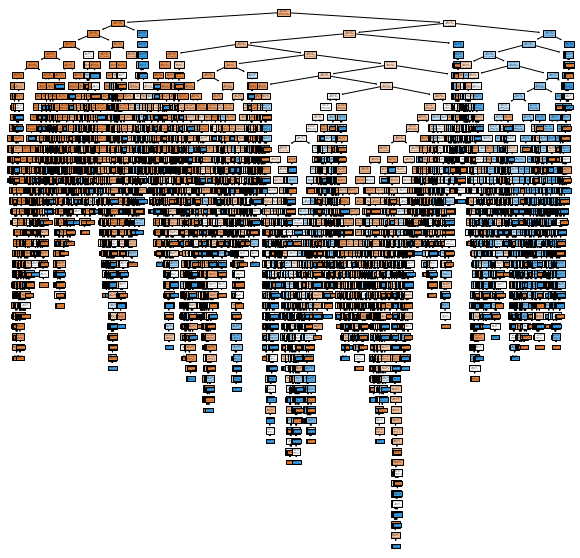

In [44]:
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled=True)
plt.show()

In [45]:
clf = tree.DecisionTreeClassifier(random_state=365, ccp_alpha=0.001)

In [46]:
clf.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=365)

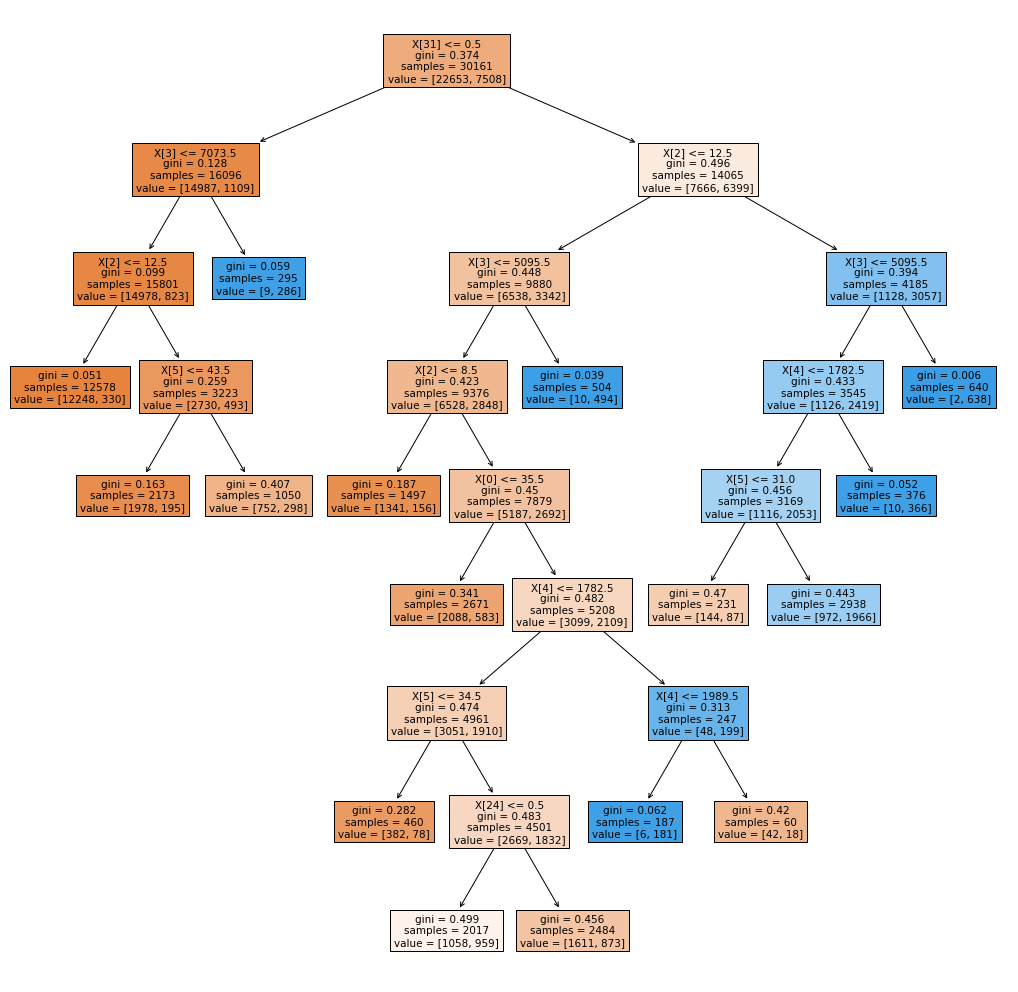

In [53]:
plt.figure(figsize=(18, 18))
tree.plot_tree(clf, filled=True)
plt.show()

## **Testing the model**

In [54]:
test_pred = clf.predict(test_input)

In [55]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11360
           1       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060

